In [4]:
#pip install tensorflow

In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers

Using TensorFlow backend.


         Passengers
Month              
1949-01       112.0
1949-02       118.0
1949-03       132.0
1949-04       129.0
1949-05       121.0


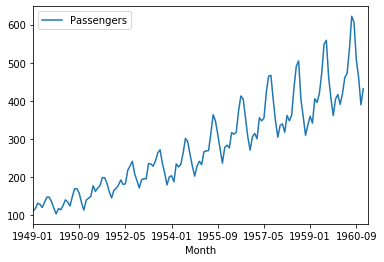

In [2]:
df = pd.read_csv('data/international-airline-passengers.csv', index_col='Month')
print(df.head())
df.plot()

In [3]:
columns_to_keep = ['Passengers']
df = df[columns_to_keep]
df['Passengers'] = df['Passengers'].apply(lambda x: x*1000)
df.index.names = ['Month']
df.sort_index(inplace=True)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 146


,Passengers
Month,
1949-01,112000.0
1949-02,118000.0
1949-03,132000.0
1949-04,129000.0
1949-05,121000.0


In [4]:
df.describe()

,Passengers
count,144.000000
mean,280298.611111
std,119966.316943
min,104000.000000
25%,180000.000000
50%,265500.000000
75%,360500.000000
max,622000.000000


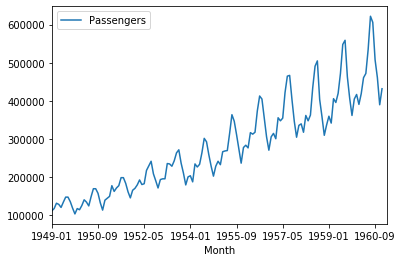

In [5]:
df.plot()

In [6]:
df.isnull().sum()

Passengers    2
dtype: int64

In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Passengers    2
dtype: int64

In [8]:
df

,Passengers
Month,
1949-01,112000.0
1949-02,118000.0
1949-03,132000.0
1949-04,129000.0
1949-05,121000.0
1949-06,135000.0
1949-07,148000.0
1949-08,148000.0
1949-09,136000.0


In [9]:
print(df[df.isnull().any(axis=1)][null_columns].head())

                                                    Passengers
Month                                                         
International airline passengers: monthly total...         NaN
NaN                                                        NaN


In [10]:
df.dropna(inplace=True)

In [11]:
print(df[df.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: [Passengers]
Index: []


In [12]:
df.isnull().sum()

Passengers    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9322C8390>]],
      dtype=object)

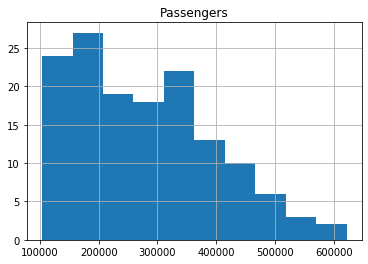

In [13]:
df.hist(bins=10)

In [14]:
len(df[df['Passengers'] == 0])

0

In [15]:
print('Min', np.min(df))
print('Max', np.max(df))

Min Passengers    104000.0
dtype: float64
Max Passengers    622000.0
dtype: float64


In [16]:
dataset = df.astype('float32')

In [17]:
dataset

,Passengers
Month,
1949-01,112000.0
1949-02,118000.0
1949-03,132000.0
1949-04,129000.0
1949-05,121000.0
1949-06,135000.0
1949-07,148000.0
1949-08,148000.0
1949-09,136000.0


In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset) 

In [19]:
scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [20]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [21]:
print(scaled[:10])
#scaled.head(10)

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]]


In [22]:
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 100
test: 44


In [23]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

100 1
0
X 0 to 1
[0.01544402]
Y 1
0.02702702702702703
1
X 1 to 2
[0.02702703]
Y 2
0.05405405405405403
2
X 2 to 3
[0.05405405]
Y 3
0.04826254826254825
3
X 3 to 4
[0.04826255]
Y 4
0.03281853281853281
4
X 4 to 5
[0.03281853]
Y 5
0.05984555984555981
5
X 5 to 6
[0.05984556]
Y 6
0.08494208494208491
6
X 6 to 7
[0.08494208]
Y 7
0.08494208494208491
7
X 7 to 8
[0.08494208]
Y 8
0.06177606177606179
8
X 8 to 9
[0.06177606]
Y 9
0.028957528957528955
9
X 9 to 10
[0.02895753]
Y 10
0.0
10
X 10 to 11
[0.]
Y 11
0.02702702702702703
11
X 11 to 12
[0.02702703]
Y 12
0.02123552123552122
12
X 12 to 13
[0.02123552]
Y 13
0.04247104247104247
13
X 13 to 14
[0.04247104]
Y 14
0.07142857142857142
14
X 14 to 15
[0.07142857]
Y 15
0.05984555984555981
15
X 15 to 16
[0.05984556]
Y 16
0.04054054054054054
16
X 16 to 17
[0.04054054]
Y 17
0.08687258687258684
17
X 17 to 18
[0.08687259]
Y 18
0.1274131274131274
18
X 18 to 19
[0.12741313]
Y 19
0.1274131274131274
19
X 19 to 20
[0.12741313]
Y 20
0.10424710424710423
20
X 20 to 21
[0.

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(98, 1, 1)
(42, 1, 1)


In [26]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
 - 0s - loss: 0.0551
Epoch 2/100
 - 0s - loss: 0.0207
Epoch 3/100
 - 0s - loss: 0.0191
Epoch 4/100
 - 0s - loss: 0.0185
Epoch 5/100
 - 0s - loss: 0.0177
Epoch 6/100
 - 0s - loss: 0.0169
Epoch 7/100
 - 0s - loss: 0.0164
Epoch 8/100
 - 0s - loss: 0.0156
Epoch 9/100
 - 0s - loss: 0.0147
Epoch 10/100
 - 0s - loss: 0.0131
Epoch 11/100
 - 0s - loss: 0.0134
Epoch 12/100
 - 0s - loss: 0.0125
Epoch 13/100
 - 0s - loss: 0.0108
Epoch 14/100
 - 0s - loss: 0.0112
Epoch 15/100
 - 0s - loss: 0.0102
Epoch 16/100
 - 0s - loss: 0.0090
Epoch 17/100
 - 0s - loss: 0.0081
Epoch 18/100
 - 0s - loss: 0.0073
Epoch 19/100
 - 0s - loss: 0.0062
Epoch 20/100
 - 0s - loss: 0.0065
Epoch 21/100
 - 0s - loss: 0.0053
Epoch 22/100
 - 0s - loss: 0.0048
Epoch 23/100
 - 0s - loss: 0.0040
Epoch 24/100
 - 0s - loss: 0.0037
Epoch 25/100
 - 0s - loss: 0.0031
Epoch 26/100
 - 0s - loss: 0.0029
Epoch 27/100
 - 0s - loss: 0.0026
Epoch 28/100
 - 0s - loss: 0.0024
Epoch 29/100
 - 0s - loss: 0.0024
Epoch 30/100
 - 0s - lo

In [27]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)

model.reset_states()
testPredict = model.predict(X_test, batch_size=batch_size)

In [28]:
testPredict

array([[0.42439708],
       [0.6204495 ],
       [0.7249826 ],
       [0.73617816],
       [0.6055228 ],
       [0.48838547],
       [0.40298548],
       [0.46851185],
       [0.4718338 ],
       [0.42691657],
       [0.52034086],
       [0.48645595],
       [0.52165914],
       [0.6685502 ],
       [0.7799818 ],
       [0.8104115 ],
       [0.59727854],
       [0.51555127],
       [0.4113807 ],
       [0.47181103],
       [0.514011  ],
       [0.47487026],
       [0.61106366],
       [0.5842276 ],
       [0.63952655],
       [0.74470073],
       [0.8942672 ],
       [0.91843706],
       [0.72374237],
       [0.6145082 ],
       [0.5192086 ],
       [0.61354977],
       [0.63027304],
       [0.57558227],
       [0.6391775 ],
       [0.7224329 ],
       [0.7435126 ],
       [0.87233037],
       [1.0346469 ],
       [1.0128789 ],
       [0.82277393],
       [0.73009115]], dtype=float32)

In [29]:
trainPredict

array([[0.03890314],
       [0.04474723],
       [0.06693739],
       [0.06407743],
       [0.05134278],
       [0.07244582],
       [0.09538919],
       [0.09743538],
       [0.0781512 ],
       [0.0495895 ],
       [0.02382646],
       [0.04249581],
       [0.0394986 ],
       [0.05656098],
       [0.08224504],
       [0.07492782],
       [0.05862673],
       [0.09599166],
       [0.13432223],
       [0.1373853 ],
       [0.11756853],
       [0.07499479],
       [0.04174357],
       [0.0797755 ],
       [0.09097175],
       [0.10053921],
       [0.14895633],
       [0.1261796 ],
       [0.14120439],
       [0.15222058],
       [0.1902572 ],
       [0.19203189],
       [0.16573301],
       [0.12643306],
       [0.09732042],
       [0.12891856],
       [0.13903591],
       [0.15567942],
       [0.1797012 ],
       [0.1595393 ],
       [0.16274111],
       [0.22579294],
       [0.25041422],
       [0.27473167],
       [0.21300131],
       [0.18010023],
       [0.14462154],
       [0.181

In [30]:
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24073.26 RMSE
Test Score: 55035.50 RMSE


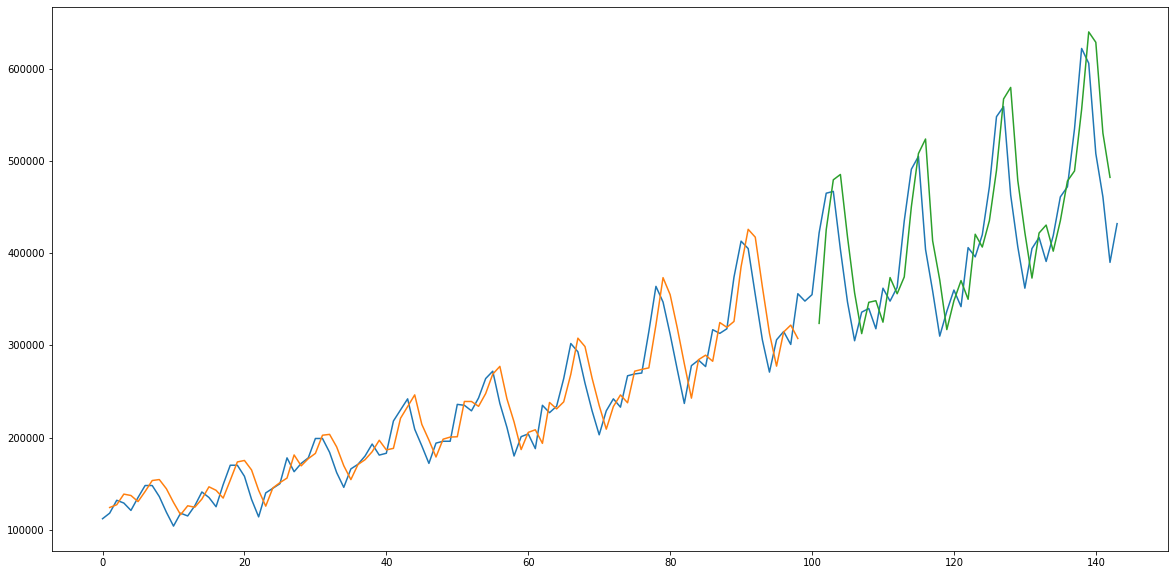

In [31]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
testPredict

array([[323837.7 ],
       [425392.84],
       [479541.  ],
       [485340.3 ],
       [417660.84],
       [356983.66],
       [312746.47],
       [346689.12],
       [348409.9 ],
       [325142.78],
       [373536.6 ],
       [355984.2 ],
       [374219.44],
       [450309.  ],
       [508030.6 ],
       [523793.2 ],
       [413390.28],
       [371055.56],
       [317095.22],
       [348398.1 ],
       [370257.72],
       [349982.8 ],
       [420531.  ],
       [406629.9 ],
       [435274.75],
       [489755.  ],
       [567230.4 ],
       [579750.44],
       [478898.56],
       [422315.28],
       [372950.06],
       [421818.78],
       [430481.44],
       [402151.62],
       [435093.97],
       [478220.25],
       [489139.53],
       [555867.1 ],
       [639947.06],
       [628671.25],
       [530196.9 ],
       [482187.22]], dtype=float32)